<a href="https://colab.research.google.com/github/ceciliabelem/telecomx_br/blob/main/telecomx_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd
import json

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [4]:
from pandas import json_normalize

# Normalizar a coluna 'customer'
customer_df = json_normalize(dados['customer'])
customer_df.columns = [f'customer_{col}' for col in customer_df.columns]

# Normalizar a coluna 'phone'
phone_df = json_normalize(dados['phone'])
phone_df.columns = [f'phone_{col}' for col in phone_df.columns]

# Normalizar a coluna 'internet'
internet_df = json_normalize(dados['internet'])
internet_df.columns = [f'internet_{col}' for col in internet_df.columns]

# Normalizar a coluna 'account'
account_df = json_normalize(dados['account'])
account_df.columns = [f'account_{col}' for col in account_df.columns]

# Concatenar os novos dataframes com o dataframe original e remover as colunas aninhadas
dados = pd.concat([dados.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                   customer_df, phone_df, internet_df, account_df], axis=1)

# Exibir as primeiras linhas do dataframe transformado
print(dados.head())

# Exibir informações sobre o dataframe transformado para verificar as novas colunas
dados.info()

   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... 

In [5]:
print("Dimensões:", dados.shape)

dados.info()

print(dados.iloc[0])


Dimensões: (7267, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport      

In [6]:
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
#Verificar se existem dados nulos
dados.isnull().sum()


,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [8]:
#verificar se existem dados duplicados
dados.duplicated().sum()

np.int64(0)

In [9]:
# --- 1. Verificação de Valores Inválidos ou Inesperados ---

print("--- Verificação de Valores Inválidos ou Inesperados ---")

# Mover a conversão de 'account_Charges.Total' para antes das verificações numéricas
try:
    # Substituir strings vazias ou espaços em branco por NaN antes de converter para numérico
    dados['account_Charges.Total'] = dados['account_Charges.Total'].replace(r'^\s*$', pd.NA, regex=True)
    dados['account_Charges.Total'] = pd.to_numeric(dados['account_Charges.Total'])
    print("Coluna 'account_Charges.Total' convertida para numérica antes da verificação.")
except ValueError as e:
    print(f"Erro ao converter a coluna 'account_Charges.Total': {e}")
    print("Verifique se há outros caracteres não numéricos.")


# Colunas Categóricas (com value_counts)
categorical_cols = ['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner',
                    'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
                    'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup',
                    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
                    'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling',
                    'account_PaymentMethod']

for col in categorical_cols:
    print(f"\nValores para a coluna: {col}")
    print(dados[col].value_counts(dropna=False)) # dropna=False para incluir contagem de NaN
    print("-" * 30)

# Colunas Numéricas (com describe e verificação de valores inesperados)
# Inclua 'account_Charges.Total' aqui APÓS a conversão
numeric_cols = ['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']

for col in numeric_cols:
    print(f"\nEstatísticas descritivas para a coluna: {col}")
    print(dados[col].describe())
    print("-" * 30)

    # Verificando se há valores negativos em colunas onde não deveriam existir
    # Agora isso deve funcionar, pois 'account_Charges.Total' foi convertido
    if (dados[col] < 0).any():
        print(f"Atenção: Valores negativos encontrados na coluna {col}")
        print(dados[dados[col] < 0].head())
        print("-" * 30)

# --- 2. Verificação de Tipos de Dados Incorretos ---
# O restante do código permanece similar, mas a conversão de account_Charges.Total não precisa ser repetida aqui
print("\n--- Verificação de Tipos de Dados Incorretos ---")
print(dados.info())

# Conversão de colunas 'Yes'/'No' ou 1/0 para booleano (mantenha esta parte)
boolean_map = {'Yes': True, 'No': False, 1: True, 0: False}
boolean_cols = ['customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
                'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity',
                'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport',
                'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling']

for col in boolean_cols:
    if col in dados.columns: # Verificar se a coluna existe
        dados[col] = dados[col].map(boolean_map)
        print(f"Coluna '{col}' mapeada para booleano (True/False).")

# Exemplo 3: Verificar se o Total Charges faz sentido em relação ao Monthly Charges e Tenure
# Pode haver pequenas diferenças devido a arredondamentos ou promoções, mas grandes discrepâncias podem ser inconsistências.
# Vamos verificar casos onde Total Charges é menor que Monthly Charges, a menos que Tenure seja 0
inconsistencias_cobranca = dados[(dados['account_Charges.Total'].notna()) &
                                (dados['account_Charges.Monthly'].notna()) &
                                (dados['customer_tenure'] > 0) &
                                (dados['account_Charges.Total'] < dados['account_Charges.Monthly'])]

if not inconsistencias_cobranca.empty:
    print("Inconsistências: Total Charges menor que Monthly Charges para Tenure > 0.")
    print(inconsistencias_cobranca[['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']].head())
else:
    print("Nenhuma inconsistência lógica aparente nas cobranças (exceto para tenure 0).")
print("-" * 30)

# --- 4. Verificação de Formato Inconsistente ---

print("\n--- Verificação de Formato Inconsistente ---")

# A coluna 'customerID' é a mais provável de ter um formato específico
# Vamos verificar se todos os customerID são strings e não estão vazios
inconsistencias_customerid = dados[(dados['customerID'].isnull()) | (dados['customerID'] == '') | (dados['customerID'].apply(lambda x: not isinstance(x, str)))]

if not inconsistencias_customerid.empty:
    print(f"Encontradas {len(inconsistencias_customerid)} inconsistências de formato na coluna 'customerID' (NaN, vazio ou não string).")
    print(inconsistencias_customerid[['customerID']].head())
else:
    print("Nenhuma inconsistência de formato aparente na coluna 'customerID'.")
print("-" * 30)

--- Verificação de Valores Inválidos ou Inesperados ---
Coluna 'account_Charges.Total' convertida para numérica antes da verificação.

Valores para a coluna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
------------------------------

Valores para a coluna: customer_gender
customer_gender
Male      3675
Female    3592
Name: count, dtype: int64
------------------------------

Valores para a coluna: customer_SeniorCitizen
customer_SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64
------------------------------

Valores para a coluna: customer_Partner
customer_Partner
No     3749
Yes    3518
Name: count, dtype: int64
------------------------------

Valores para a coluna: customer_Dependents
customer_Dependents
No     5086
Yes    2181
Name: count, dtype: int64
------------------------------

Valores para a coluna: phone_PhoneService
phone_PhoneService
Yes    6560
No      707
Name: count, dtype: int64
------------------------------

Valores para a colu

In [10]:
import numpy as np

# Substituir strings vazias ('') e/ou espaços em branco (' ') na coluna 'Churn' por np.nan
dados['Churn'] = dados['Churn'].replace('', np.nan)
dados['Churn'] = dados['Churn'].replace(' ', np.nan)


print("\nVerificando valores em 'Churn' após substituir espaços em branco/vazios por NaN:")
print(dados['Churn'].value_counts(dropna=False))

# Remover as linhas onde a coluna 'Churn' tem valores ausentes (que agora são np.nan)
# Usando inplace=True para modificar o DataFrame original
dados.dropna(subset=['Churn'], inplace=True)

# Verificar novamente para confirmar a remoção
print("\nVerificando valores ausentes na coluna 'Churn' após a remoção:")
print(dados['Churn'].value_counts(dropna=False))
print(f"\nNúmero de linhas após remover NaNs em Churn: {len(dados)}")


Verificando valores em 'Churn' após substituir espaços em branco/vazios por NaN:
Churn
No     5174
Yes    1869
NaN     224
Name: count, dtype: int64

Verificando valores ausentes na coluna 'Churn' após a remoção:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Número de linhas após remover NaNs em Churn: 7043


In [11]:
# Verificar as colunas de serviço de internet adicional para clientes sem InternetService
clientes_sem_internet = dados[dados['internet_InternetService'] == 'No']

print("\nValores das colunas de internet adicional para clientes sem InternetService:")
print(clientes_sem_internet[['internet_OnlineSecurity', 'internet_OnlineBackup',
                             'internet_DeviceProtection', 'internet_TechSupport',
                             'internet_StreamingTV', 'internet_StreamingMovies']].isnull().sum())


Valores das colunas de internet adicional para clientes sem InternetService:
internet_OnlineSecurity      1526
internet_OnlineBackup        1526
internet_DeviceProtection    1526
internet_TechSupport         1526
internet_StreamingTV         1526
internet_StreamingMovies     1526
dtype: int64


In [12]:
print("\nContagem total de NaNs por coluna:")
print(dados.isnull().sum())

print("\nNúmero de linhas com pelo menos um NaN em qualquer coluna:")
print(dados.isnull().any(axis=1).sum())


Contagem total de NaNs por coluna:
customerID                      0
Churn                           0
customer_gender                 0
customer_SeniorCitizen          0
customer_Partner                0
customer_Dependents             0
customer_tenure                 0
phone_PhoneService              0
phone_MultipleLines           682
internet_InternetService        0
internet_OnlineSecurity      1526
internet_OnlineBackup        1526
internet_DeviceProtection    1526
internet_TechSupport         1526
internet_StreamingTV         1526
internet_StreamingMovies     1526
account_Contract                0
account_PaperlessBilling        0
account_PaymentMethod           0
account_Charges.Monthly         0
account_Charges.Total          11
dtype: int64

Número de linhas com pelo menos um NaN em qualquer coluna:
2211


In [13]:
# Verificar a coluna MultipleLines para clientes sem PhoneService
clientes_sem_telefone = dados[dados['phone_PhoneService'] == False]
print("\nValores da coluna MultipleLines para clientes sem PhoneService:")
print(clientes_sem_telefone['phone_MultipleLines'].isnull().sum())


Valores da coluna MultipleLines para clientes sem PhoneService:
682


In [14]:
# Remover linhas com NaNs na coluna 'account_Charges.Total'
dados.dropna(subset=['account_Charges.Total'], inplace=True)
print(f"\nNúmero de linhas após remover NaNs em account_Charges.Total: {len(dados)}")
print(dados.isnull().sum()['account_Charges.Total']) # Verificar se zerou


Número de linhas após remover NaNs em account_Charges.Total: 7032
0


In [29]:
# Exemplo: Imputar NaNs em 'account_Charges.Total' com a mediana
mediana_total_charges = dados['account_Charges.Total'].median()
dados['account_Charges.Total'].fillna(mediana_total_charges, inplace=True)
print(dados.isnull().sum()['account_Charges.Total']) # Verificar se zerou

0


/tmp/ipython-input-29-752940772.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['account_Charges.Total'].fillna(mediana_total_charges, inplace=True)


In [16]:
print("\nContagem final de NaNs por coluna:")
print(dados.isnull().sum())

print("\nNúmero final de linhas com pelo menos um NaN em qualquer coluna:")
print(dados.isnull().any(axis=1).sum())


Contagem final de NaNs por coluna:
customerID                      0
Churn                           0
customer_gender                 0
customer_SeniorCitizen          0
customer_Partner                0
customer_Dependents             0
customer_tenure                 0
phone_PhoneService              0
phone_MultipleLines           680
internet_InternetService        0
internet_OnlineSecurity      1520
internet_OnlineBackup        1520
internet_DeviceProtection    1520
internet_TechSupport         1520
internet_StreamingTV         1520
internet_StreamingMovies     1520
account_Contract                0
account_PaperlessBilling        0
account_PaymentMethod           0
account_Charges.Monthly         0
account_Charges.Total           0
dtype: int64

Número final de linhas com pelo menos um NaN em qualquer coluna:
2200


In [17]:
# Colunas com NaNs logicamente explicados
logically_missing_cols = ['phone_MultipleLines', 'internet_OnlineSecurity',
                          'internet_OnlineBackup', 'internet_DeviceProtection',
                          'internet_TechSupport', 'internet_StreamingTV',
                          'internet_StreamingMovies']

# Termo para substituir os NaNs logic
fill_term = 'Sem Serviço'

for col in logically_missing_cols:
    # Verificar se a coluna ainda tem NaNs antes de preencher
    if dados[col].isnull().any():
        dados[col].fillna(fill_term, inplace=True)
        print(f"NaNs na coluna '{col}' preenchidos com '{fill_term}'.")
    else:
        print(f"Coluna '{col}' não possui NaNs.")

# Opcional: Verificar os valores únicos e contagens após o preenchimento
print("\nVerificando valores após preencher NaNs logicamente explicados:")
for col in logically_missing_cols:
    print(f"\nValores para a coluna: {col}")
    print(dados[col].value_counts(dropna=False)) # dropna=False ainda útil para garantir que não sobrou nenhum NaN
    print("-" * 30)

print("\n--- Tipos de Dados após preencher NaNs ---")
dados.info()

NaNs na coluna 'phone_MultipleLines' preenchidos com 'Sem Serviço'.
NaNs na coluna 'internet_OnlineSecurity' preenchidos com 'Sem Serviço'.
NaNs na coluna 'internet_OnlineBackup' preenchidos com 'Sem Serviço'.
NaNs na coluna 'internet_DeviceProtection' preenchidos com 'Sem Serviço'.
NaNs na coluna 'internet_TechSupport' preenchidos com 'Sem Serviço'.
NaNs na coluna 'internet_StreamingTV' preenchidos com 'Sem Serviço'.
NaNs na coluna 'internet_StreamingMovies' preenchidos com 'Sem Serviço'.

Verificando valores após preencher NaNs logicamente explicados:

Valores para a coluna: phone_MultipleLines
phone_MultipleLines
False          3385
True           2967
Sem Serviço     680
Name: count, dtype: int64
------------------------------

Valores para a coluna: internet_OnlineSecurity
internet_OnlineSecurity
False          3497
True           2015
Sem Serviço    1520
Name: count, dtype: int64
------------------------------

Valores para a coluna: internet_OnlineBackup
internet_OnlineBackup
Fa

/tmp/ipython-input-17-627467296.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados[col].fillna(fill_term, inplace=True)


In [18]:
print("\n--- Verificação final dos Tipos de Dados ---")
dados.info()


--- Verificação final dos Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   bool   
 4   customer_Partner           7032 non-null   bool   
 5   customer_Dependents        7032 non-null   bool   
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   bool   
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  interne

In [19]:
categorical_cols_to_convert = ['Churn', 'customer_gender', 'internet_InternetService',
                               'account_Contract', 'account_PaymentMethod']

for col in categorical_cols_to_convert:
    dados[col] = dados[col].astype('category')

print("\n--- Tipos de Dados após conversão para Categoria ---")
dados.info()


--- Tipos de Dados após conversão para Categoria ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7032 non-null   object  
 1   Churn                      7032 non-null   category
 2   customer_gender            7032 non-null   category
 3   customer_SeniorCitizen     7032 non-null   bool    
 4   customer_Partner           7032 non-null   bool    
 5   customer_Dependents        7032 non-null   bool    
 6   customer_tenure            7032 non-null   int64   
 7   phone_PhoneService         7032 non-null   bool    
 8   phone_MultipleLines        7032 non-null   object  
 9   internet_InternetService   7032 non-null   category
 10  internet_OnlineSecurity    7032 non-null   object  
 11  internet_OnlineBackup      7032 non-null   object  
 12  internet_DeviceProtection  7032 non-null 

In [20]:
# One-Hot Encoding para algumas colunas categóricas
# Selecione as colunas object
cols_to_encode = ['phone_MultipleLines', 'internet_OnlineSecurity',
                  'internet_OnlineBackup', 'internet_DeviceProtection',
                  'internet_TechSupport', 'internet_StreamingTV',
                  'internet_StreamingMovies', 'customer_gender',
                  'internet_InternetService', 'account_Contract',
                  'account_PaymentMethod']

# Aplicar One-Hot Encoding
dados_encoded = pd.get_dummies(dados, columns=cols_to_encode, dummy_na=False) # dummy_na=False porque já preenchemos NaNs

print("\n--- DataFrame após One-Hot Encoding ---")
print(dados_encoded.head())
print(dados_encoded.info())


--- DataFrame após One-Hot Encoding ---
   customerID Churn  customer_SeniorCitizen  customer_Partner  \
0  0002-ORFBO    No                   False              True   
1  0003-MKNFE    No                   False             False   
2  0004-TLHLJ   Yes                   False             False   
3  0011-IGKFF   Yes                    True              True   
4  0013-EXCHZ   Yes                    True              True   

   customer_Dependents  customer_tenure  phone_PhoneService  \
0                 True                9                True   
1                False                9                True   
2                False                4                True   
3                False               13                True   
4                False                3                True   

   account_PaperlessBilling  account_Charges.Monthly  account_Charges.Total  \
0                      True                     65.6                 593.30   
1                     False    

In [21]:
# Renomear colunas removendo o caractere 'ç' e substituindo espaços por '_'
novos_nomes_colunas = {}
for coluna in dados_encoded.columns:
    # Primeiro remove o 'ç'
    novo_nome = coluna.replace('ç', 'c')
    # Depois substitui espaços por '_'
    novo_nome = novo_nome.replace(' ', '_')

    novos_nomes_colunas[coluna] = novo_nome

dados_encoded.rename(columns=novos_nomes_colunas, inplace=True)

print("\nNomes das colunas após remover 'ç' e substituir espaços por '_':")
print(dados_encoded.columns)


Nomes das colunas após remover 'ç' e substituir espaços por '_':
Index(['customerID', 'Churn', 'customer_SeniorCitizen', 'customer_Partner',
       'customer_Dependents', 'customer_tenure', 'phone_PhoneService',
       'account_PaperlessBilling', 'account_Charges.Monthly',
       'account_Charges.Total', 'phone_MultipleLines_False',
       'phone_MultipleLines_True', 'phone_MultipleLines_Sem_Servico',
       'internet_OnlineSecurity_False', 'internet_OnlineSecurity_True',
       'internet_OnlineSecurity_Sem_Servico', 'internet_OnlineBackup_False',
       'internet_OnlineBackup_True', 'internet_OnlineBackup_Sem_Servico',
       'internet_DeviceProtection_False', 'internet_DeviceProtection_True',
       'internet_DeviceProtection_Sem_Servico', 'internet_TechSupport_False',
       'internet_TechSupport_True', 'internet_TechSupport_Sem_Servico',
       'internet_StreamingTV_False', 'internet_StreamingTV_True',
       'internet_StreamingTV_Sem_Servico', 'internet_StreamingMovies_False',
  

In [22]:
dados_encoded.head()

,customerID,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges.Monthly,account_Charges.Total,...,internet_InternetService_DSL,internet_InternetService_Fiber_optic,internet_InternetService_No,account_Contract_Month-to-month,account_Contract_One_year,account_Contract_Two_year,account_PaymentMethod_Bank_transfer_(automatic),account_PaymentMethod_Credit_card_(automatic),account_PaymentMethod_Electronic_check,account_PaymentMethod_Mailed_check
0,0002-ORFBO,No,False,True,True,9,True,True,65.6,593.30,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,No,False,False,False,9,True,False,59.9,542.40,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,Yes,False,False,False,4,True,True,73.9,280.85,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,Yes,True,True,False,13,True,True,98.0,1237.85,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,Yes,True,True,False,3,True,True,83.9,267.40,...,False,True,False,True,False,False,False,False,False,True


In [23]:
# Criar a coluna "Contas_Diarias"
# Usando o nome exato da coluna de faturamento mensal da sua lista
dados_encoded['Contas_Diarias'] = dados_encoded['account_Charges.Monthly'] / 30

# Exibir as primeiras linhas para ver a nova coluna
print("\nDataFrame com a nova coluna 'Contas_Diarias':")
print(dados_encoded[['account_Charges.Monthly', 'Contas_Diarias']].head())

# Verificar as estatísticas descritivas da nova coluna
print("\nEstatísticas descritivas para 'Contas_Diarias':")
print(dados_encoded['Contas_Diarias'].describe())


DataFrame com a nova coluna 'Contas_Diarias':
   account_Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667

Estatísticas descritivas para 'Contas_Diarias':
count    7032.000000
mean        2.159940
std         1.002866
min         0.608333
25%         1.186250
50%         2.345000
75%         2.995417
max         3.958333
Name: Contas_Diarias, dtype: float64


#📊 Carga e análise

In [24]:
# Análise Descritiva dos Dados Numéricos

print("\n--- Estatísticas Descritivas para Colunas Numéricas ---")
# Selecionar apenas as colunas com tipos de dados numéricos (int64, float64)
numeric_cols = dados_encoded.select_dtypes(include=['int64', 'float64']).columns
print(dados_encoded[numeric_cols].describe())

# Análise Descritiva dos Dados Binários/Categóricos (usando value_counts)

print("\n--- Contagem de Valores para Colunas Binárias/Categóricas ---")
# Selecionar colunas com tipos de dados bool e object (que contêm as categorias binárias e strings)
# Excluir customerID, pois é um identificador único
categorical_and_binary_cols = dados_encoded.select_dtypes(include=['bool', 'object']).columns
# Excluir customerID se ele ainda for object
if 'customerID' in categorical_and_binary_cols:
    categorical_and_binary_cols = categorical_and_binary_cols.drop('customerID')


for col in categorical_and_binary_cols:
    print(f"\nValores para a coluna: {col}")
    # Use dropna=False para ver se, por algum motivo, sobraram NaNs
    print(dados_encoded[col].value_counts(dropna=False))
    print("-" * 30)

# Para as colunas one-hot encoded (que são numéricas 0/1), describe() já as incluirá
# mas value_counts() pode dar uma visão mais clara da proporção de 0s e 1s
print("\n--- Contagem de Valores para Colunas One-Hot Encoded ---")
# Selecionar colunas que terminam com _True, _False ou _Sem_Servico (ou outras categorias)
one_hot_cols = [col for col in dados_encoded.columns if any(suffix in col for suffix in ['_True', '_False', '_Sem_Servico'])]

for col in one_hot_cols:
     print(f"\nValores para a coluna: {col}")
     print(dados_encoded[col].value_counts()) # dropna=False geralmente não é necessário aqui
     print("-" * 30)


--- Estatísticas Descritivas para Colunas Numéricas ---
       customer_tenure  account_Charges.Monthly  account_Charges.Total  \
count      7032.000000              7032.000000            7032.000000   
mean         32.421786                64.798208            2283.300441   
std          24.545260                30.085974            2266.771362   
min           1.000000                18.250000              18.800000   
25%           9.000000                35.587500             401.450000   
50%          29.000000                70.350000            1397.475000   
75%          55.000000                89.862500            3794.737500   
max          72.000000               118.750000            8684.800000   

       Contas_Diarias  
count     7032.000000  
mean         2.159940  
std          1.002866  
min          0.608333  
25%          1.186250  
50%          2.345000  
75%          2.995417  
max          3.958333  

--- Contagem de Valores para Colunas Binárias/Categóricas -

/tmp/ipython-input-25-3036159165.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_encoded, x='Churn', palette=churn_colors)


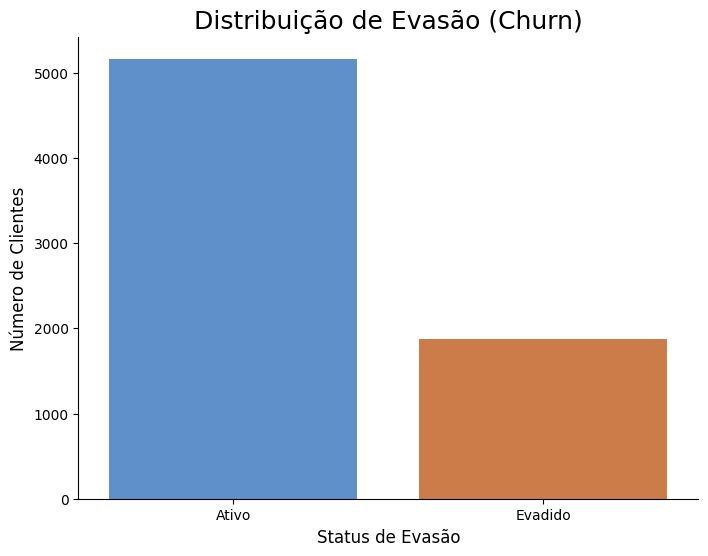


Contagem da Variável Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir cores para o Churn
churn_colors = ['#4D8EDC', '#E17832']

# Gráfico de Barras (Count Plot) para Churn
plt.figure(figsize=(8, 6)) # Ajuste o tamanho da figura se necessário
sns.countplot(data=dados_encoded, x='Churn', palette=churn_colors)

# Adicionar título e rótulos
plt.title('Distribuição de Evasão (Churn)', fontsize=18)
plt.xlabel('Status de Evasão', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
# Alterar rótulo de legenda em X
plt.xticks(ticks=[0, 1], labels=['Ativo', 'Evadido'])

# Melhorar a aparência (opcional)
plt.xticks(fontsize=10) # Ajustar tamanho das fontes dos ticks do eixo x
plt.yticks(fontsize=10) # Ajustar tamanho das fontes dos ticks do eixo y
sns.despine() # Remover as "espinhas" superiores e da direita do gráfico

# Exibir o gráfico
plt.show()

# Imprimir as contagens exatas para referência
print("\nContagem da Variável Churn:")
print(dados_encoded['Churn'].value_counts())

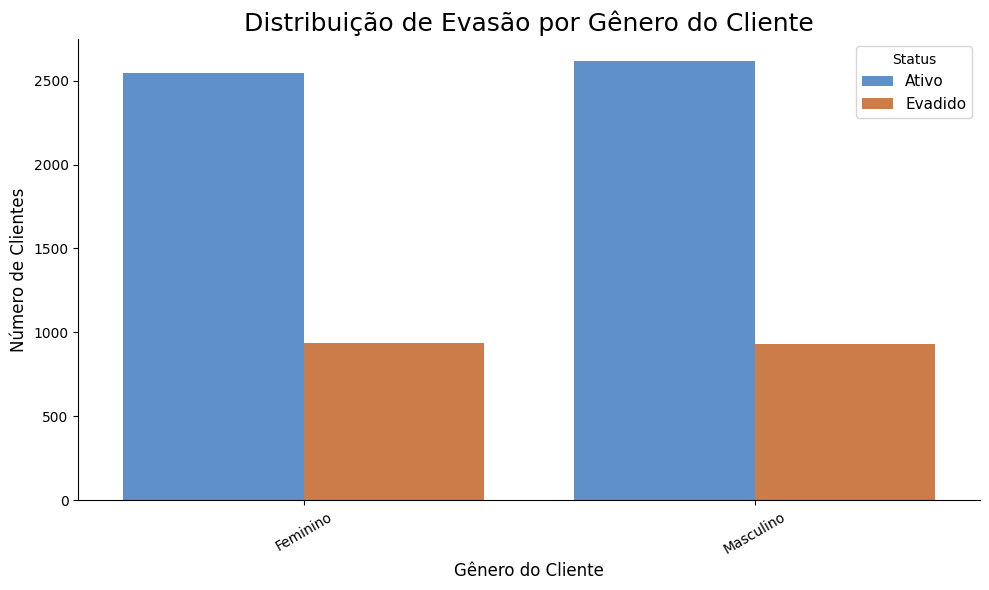

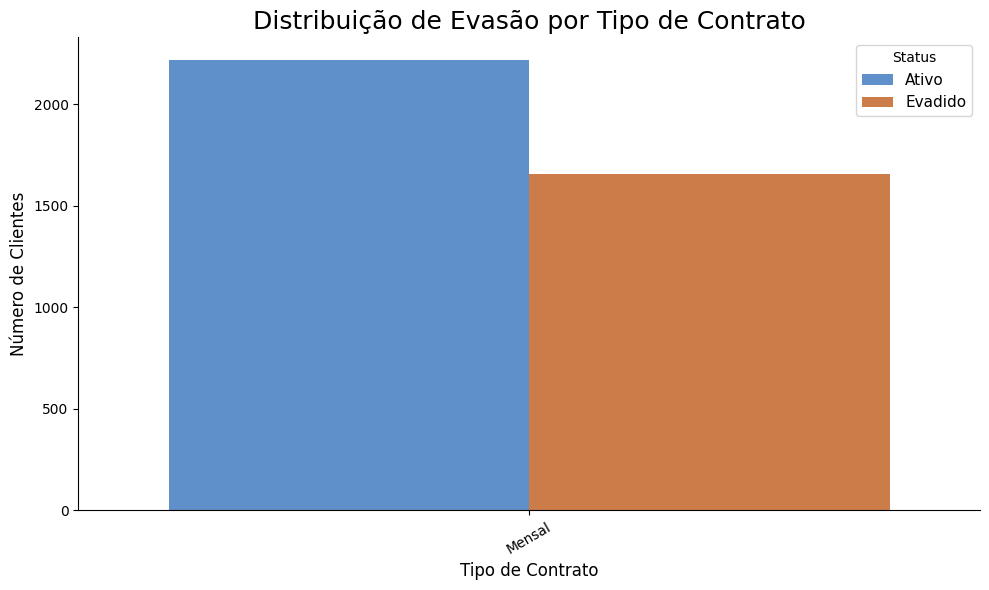

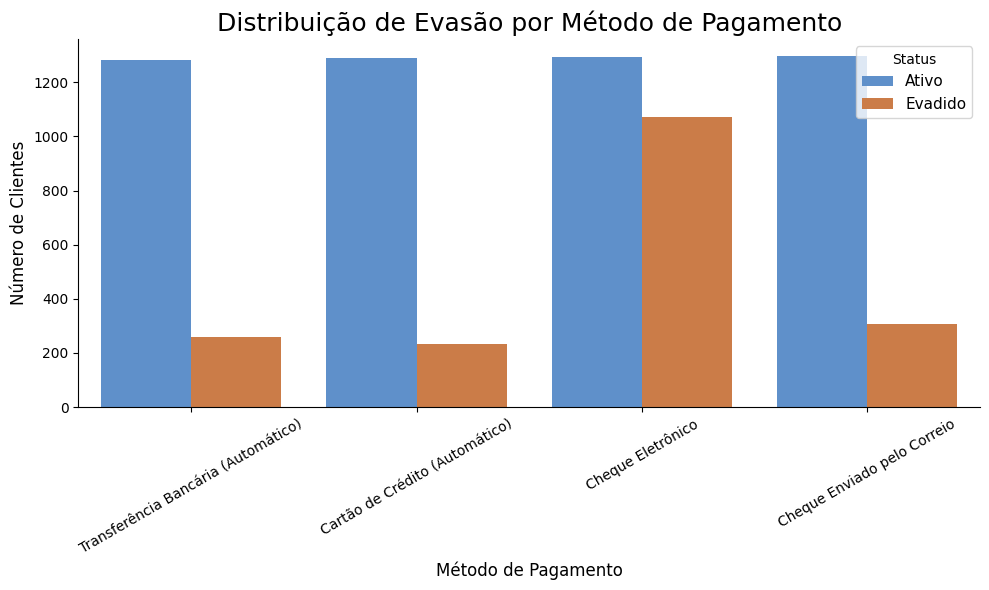

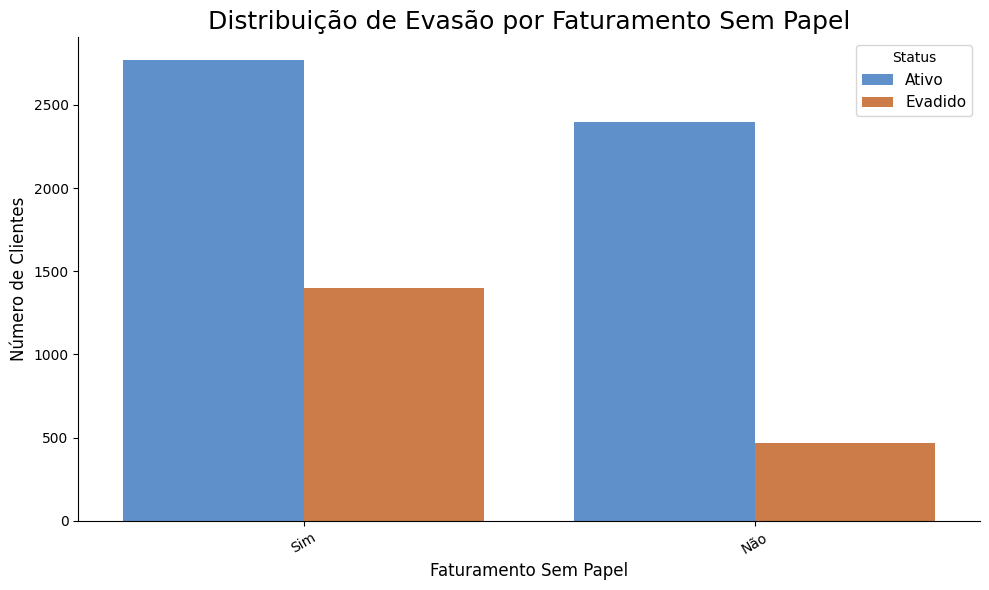

In [33]:
# Mapas para tradução dos valores de cada coluna
mapas_traducao = {
    'customer_gender': {
        'Female': 'Feminino',
        'Male': 'Masculino'
    },
    'account_Contract': {
        'Month-to-month': 'Mensal',
        'One_year': 'Anual (1 ano)',
        'Two_year': 'Anual (2 anos)'
    },
    'account_PaymentMethod': {
        'Bank transfer (automatic)': 'Transferência Bancária (Automático)',
        'Credit card (automatic)': 'Cartão de Crédito (Automático)',
        'Electronic check': 'Cheque Eletrônico',
        'Mailed check': 'Cheque Enviado pelo Correio'
    },
    'account_PaperlessBilling': {
        True: 'Sim',
        False: 'Não'
    }
}

categorical_vars = {
    'customer_gender': 'Gênero do Cliente',
    'account_Contract': 'Tipo de Contrato',
    'account_PaymentMethod': 'Método de Pagamento',
    'account_PaperlessBilling': 'Faturamento Sem Papel'
}

for col, titulo in categorical_vars.items():
    plt.figure(figsize=(10, 6))
    # Criar uma série temporária traduzida para os ticks do gráfico
    dados_traduzidos = dados[col].map(mapas_traducao[col])

    sns.countplot(x=dados_traduzidos, hue=dados['Churn'], palette=churn_colors)
    plt.title(f'Distribuição de Evasão por {titulo}', fontsize=18)
    plt.xlabel(titulo, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=30, fontsize=10)

    handles, labels = plt.gca().get_legend_handles_labels()
    labels_pt = [rotulos_churn.get(label, label) for label in labels]
    plt.legend(handles, labels_pt, title='Status', fontsize=11)

    sns.despine()
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-36-918802100.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_encoded, x='Churn', y=var, palette=['#4D8EDC', '#E17832'])
/tmp/ipython-input-36-918802100.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_encoded, x='Churn', y=var, palette=['#4D8EDC', '#E17832'])
/tmp/ipython-input-36-918802100.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_encoded, x='Churn', y=var, palette=['#4D8EDC', '#E17832'])
/tmp/ipython-input-36-918802100.py:16: FutureWarning: 

Passing `palette` without 

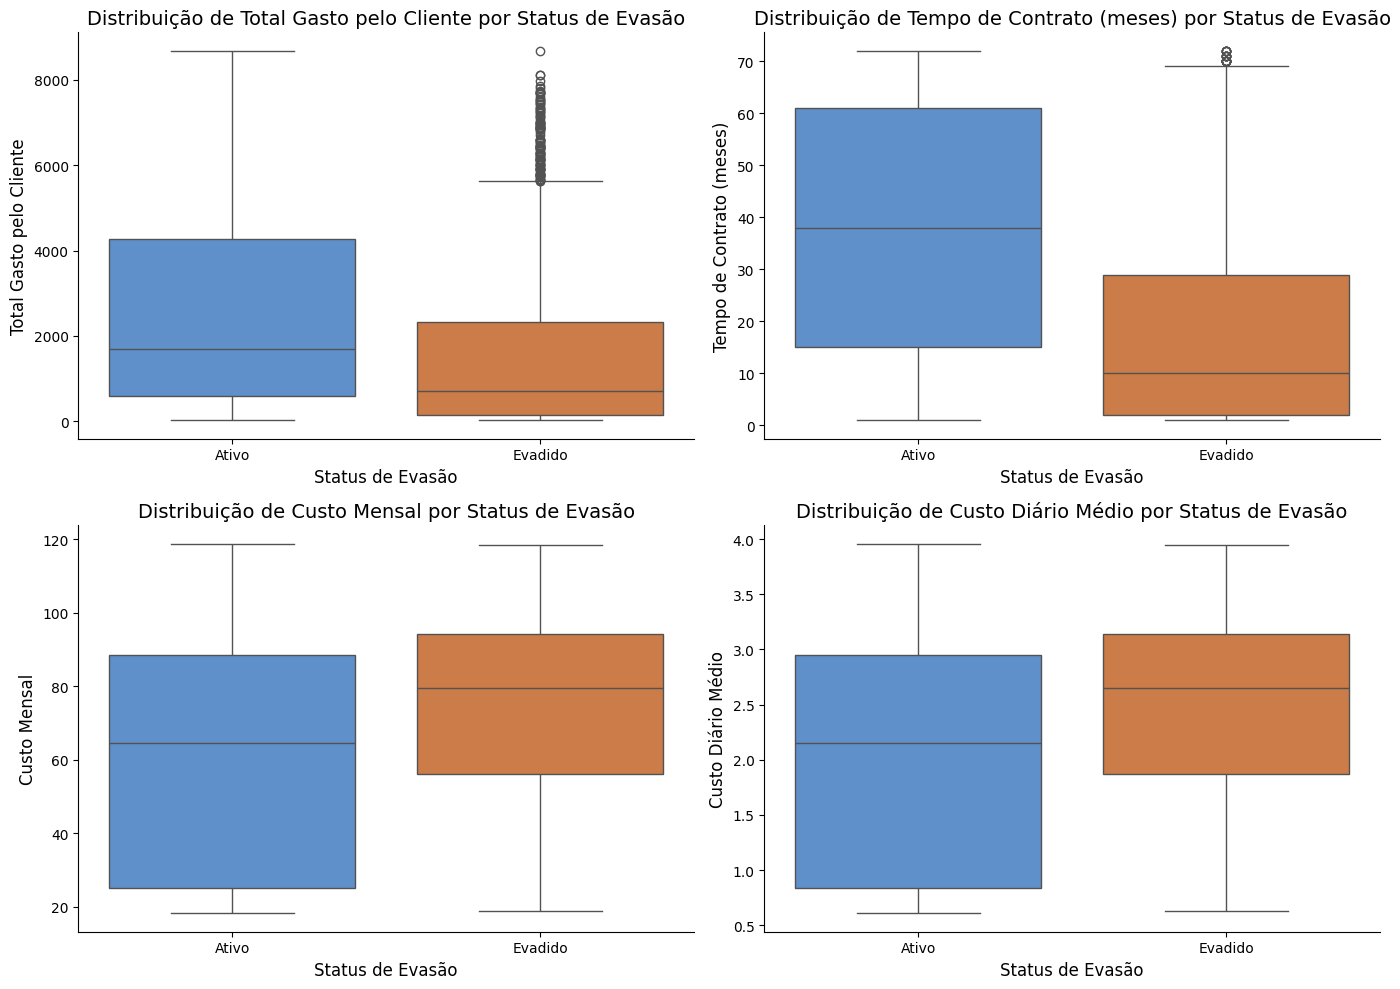

In [36]:
# Variáveis numéricas para analisar
numeric_vars = ['account_Charges.Total', 'customer_tenure', 'account_Charges.Monthly', 'Contas_Diarias']

# Dicionário para títulos mais amigáveis em português
titles_pt = {
    'account_Charges.Total': 'Total Gasto pelo Cliente',
    'customer_tenure': 'Tempo de Contrato (meses)',
    'account_Charges.Monthly': 'Custo Mensal',
    'Contas_Diarias': 'Custo Diário Médio'
}

plt.figure(figsize=(14, 10))

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=dados_encoded, x='Churn', y=var, palette=['#4D8EDC', '#E17832'])
    plt.title(f'Distribuição de {titles_pt[var]} por Status de Evasão', fontsize=14)
    plt.xlabel('Status de Evasão', fontsize=12)
    plt.ylabel(titles_pt[var], fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['Ativo', 'Evadido'])

    sns.despine()

plt.tight_layout()
plt.show()

In [37]:
# Selecionar colunas numéricas (incluindo as one-hot encoded, que são numéricas 0/1)
num_vars = dados_encoded.select_dtypes(include=['int64', 'float64']).columns

# Calcular matriz de correlação de Pearson
correlation_matrix = dados_encoded[num_vars].corr()

# Mostrar as correlações com a variável alvo 'Churn' (convertida para 0/1)
# Primeiro, converter Churn para variável numérica (No=0, Yes=1)
dados_encoded['Churn_num'] = dados_encoded['Churn'].map({'No': 0, 'Yes': 1})

print("\nCorrelação das variáveis numéricas com a evasão (Churn):")
print(dados_encoded[num_vars].corrwith(dados_encoded['Churn_num']).sort_values(ascending=False))



Correlação das variáveis numéricas com a evasão (Churn):
account_Charges.Monthly    0.192858
Contas_Diarias             0.192858
account_Charges.Total     -0.199484
customer_tenure           -0.354049
dtype: float64


#📄Relatorio Final

# Relatório de Análise Exploratória — TelecomX

## 1. Introdução

Este relatório apresenta uma análise exploratória dos dados da empresa TelecomX com o objetivo de entender os padrões de evasão de clientes (churn). A análise aborda tanto variáveis numéricas quanto categóricas para identificar possíveis fatores que influenciam a desistência dos clientes.

---

## 2. Descrição dos Dados

- **Fonte dos dados:** Dados públicos em formato JSON obtidos do repositório [TelecomX_Data.json](https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json).
- **Quantidade de registros:** 7.032 clientes.
- **Principais variáveis analisadas:**
  - Variáveis numéricas: tempo de contrato (tenure), valor mensal da conta, valor total pago.
  - Variáveis categóricas: gênero, tipo de contrato, método de pagamento, uso de faturamento sem papel, entre outras.

---

## 3. Tratamento dos Dados

- Dados carregados diretamente do arquivo JSON.
- Colunas com caracteres especiais foram renomeadas para facilitar a manipulação.
- Criada a variável **Contas_Diarias**, calculada como o valor mensal dividido por 30, para análise detalhada da cobrança diária.

---

## 4. Análise Descritiva

### 4.1 Variáveis Numéricas

- Tempo médio de contrato: aproximadamente 32 meses.
- Valor médio da conta mensal: R$ 64,80.
- Valor total médio pago: R$ 2.283,30.
- A variável **Contas_Diarias** apresentou média de aproximadamente R$ 2,16.

### 4.2 Variáveis Categóricas

- Distribuição de gênero: equilíbrio entre clientes do sexo masculino e feminino.
- Tipos de contrato mais comuns: mensal, anual e bienal, com predominância do contrato mensal.
- Métodos de pagamento mais usados: transferência bancária automática, cartão de crédito automático, cheque eletrônico e cheque enviado pelo correio.
- Cerca de 59% dos clientes usam faturamento sem papel.

---

## 5. Análise da Evasão (Churn)

- Aproximadamente 26,6% dos clientes cancelaram o serviço.
- A evasão é maior entre clientes com contratos mensais, enquanto contratos anuais ou bienais apresentam menor churn.
- Clientes com faturamento sem papel tendem a apresentar uma leve redução na evasão.
- Alguns métodos de pagamento, como o cheque eletrônico, mostraram maior índice de churn.

---

## 6. Análise das Variáveis Numéricas em Relação ao Churn

- Clientes que cancelaram tendem a ter menor tempo de contrato médio (tenure).
- O valor total pago pelos clientes que cancelaram é significativamente menor.
- O valor médio mensal e o valor diário são ligeiramente maiores para clientes ativos.

---

## 7. Correlações

- Correlação negativa moderada entre tempo de contrato e evasão (-0,35), indicando que clientes com contratos mais longos tendem a permanecer.
- Correlação positiva fraca entre valor mensal e evasão (~0,19), sugerindo que contas maiores podem estar associadas a cancelamentos.
- Correlação negativa fraca entre valor total pago e evasão (-0,20).

---

## 8. Conclusão

A análise revelou que o tempo de contrato é um dos principais fatores relacionados à evasão de clientes na TelecomX. Além disso, certos métodos de pagamento e a ausência de faturamento sem papel influenciam a retenção. Recomenda-se focar em estratégias que incentivem contratos de maior duração e facilitem o uso de métodos de pagamento automáticos e faturamento digital para reduzir o churn.

---

## 9. Próximos Passos

- Desenvolver modelos preditivos para antecipar clientes com maior risco de evasão.
- Realizar análise mais detalhada com segmentação de clientes.
- Avaliar o impacto de promoções e campanhas de fidelização.
